In [ ]:
pip install nltk scikit-learn

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word not in stopwords.words('english')]
    cleaned_text = ' '.join(words)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv', encoding='ISO-8859-1')
dt=data
print(data.shape)
dt.dropna(subset=['text'], inplace=True)
dt.drop('selected_text', inplace=True, axis=1)
dt.drop('sentiment', inplace=True, axis=1)
cleaned_data = [preprocess_text(text) for text in dt['text']]
print(cleaned_data)

(27481, 4)
['responded going', 'sooo sad miss san diego', 'boss bullying', 'interview leave alone', 'sons put releases already bought', 'http www dothebouncy com smf shameless plugging best rangers forum earth', 'feedings baby fun smiles coos', 'soooo high', '', 'journey wow u became cooler hehe possible', 'much love hopeful reckon chances minimal p never gon na get cake stuff', 'really really like song love story taylor swift', 'sharpie running dangerously low ink', 'want go music tonight lost voice', 'test test lg env', 'uh oh sunburned', 'ok trying plot alternatives speak sigh', 'sick past days thus hair looks wierd didnt hat would look http tinyurl com mnf kw', 'back home gon na miss every one', 'hes', 'oh marly sorry hope find soon', 'playing ghost online really interesting new updates kirin pet metamorph third job wait dragon pet', 'cleaning house family comming later today', 'got ta restart computer thought win supposed put end constant rebootiness', 'see wat mean bout foll w fr

In [ ]:
dt['processed_tweets']=cleaned_data
dt.head()

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                   processed_tweets  
0                   responded going  
1           sooo sad miss san diego  
2                     boss bullying  
3             interview leave alone  
4  sons put releases already bought  


In [ ]:
analyzer = SentimentIntensityAnalyzer()
dt['compound'] = [analyzer.polarity_scores(x)['compound'] for x in dt['processed_tweets']]
dt['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dt['processed_tweets']]
dt['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dt['processed_tweets']]
dt['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dt['processed_tweets']]
dt['comp_score'] = dt['compound'].apply(lambda c: 0 if c >=0 else 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt['processed_tweets'],dt['comp_score'],test_size=0.3,random_state=42)
print('Number of rows in the total set: {}'.format(dt.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))
# print(X_train)

Number of rows in the total set: 27480
Number of rows in the training set: 19236
Number of rows in the test set: 8244


In [ ]:

vector = CountVectorizer(stop_words = 'english', lowercase = True)
training_data = vector.fit_transform(X_train)
testing_data = vector.transform(X_test)
# vectoriser = TfidfVectorizer()
# vectoriser.fit(X_train)
# training_data = vectoriser.transform(X_train)
# testing_data= vectoriser.transform(X_test)

In [ ]:

Naive =MultinomialNB()
Naive.fit(training_data, y_train)
y_pred = Naive.predict(testing_data)
accuracy=accuracy_score(y_pred,y_test)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8624454148471615
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      6385
           1       0.86      0.46      0.60      1859

    accuracy                           0.86      8244
   macro avg       0.86      0.72      0.76      8244
weighted avg       0.86      0.86      0.85      8244



In [ ]:

svc=SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(training_data,y_train)
y_pred=svc.predict(testing_data)
accuracy=accuracy_score(y_pred,y_test)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9217612809315866
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6385
           1       0.86      0.78      0.82      1859

    accuracy                           0.92      8244
   macro avg       0.90      0.87      0.88      8244
weighted avg       0.92      0.92      0.92      8244



In [ ]:

boost_class=GradientBoostingClassifier(n_estimators=10,random_state=3)
boost_class.fit(training_data,y_train)
y_pred=boost_class.predict(testing_data)
accuracy=accuracy_score(y_pred,y_test)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7952450266860748
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      6385
           1       0.80      0.12      0.21      1859

    accuracy                           0.80      8244
   macro avg       0.80      0.56      0.55      8244
weighted avg       0.80      0.80      0.73      8244



In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# for i in range(1,25):
#   neigh = KNeighborsClassifier(n_neighbors=i)
#   neigh.fit(training_data,y_train)
#   svc_pred=neigh.predict(testing_data)
#   print('Model accuracy score')
#   print(format(accuracy_score(y_test, svc_pred)))

In [ ]:

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(training_data, y_train)
y_pred = logistic_model.predict(testing_data)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9098738476467734
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6385
           1       0.89      0.68      0.77      1859

    accuracy                           0.91      8244
   macro avg       0.90      0.83      0.86      8244
weighted avg       0.91      0.91      0.91      8244



In [ ]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(training_data, y_train)
y_pred = random_forest_model.predict(testing_data)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.901018922852984
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6385
           1       0.78      0.78      0.78      1859

    accuracy                           0.90      8244
   macro avg       0.86      0.86      0.86      8244
weighted avg       0.90      0.90      0.90      8244



In [ ]:
models_report=pd.DataFrame()
models_report['models']=[MultinomialNB(),
              SVC(kernel='linear', C=1.0, random_state=42),
              GradientBoostingClassifier(n_estimators=10,random_state=3),
              LogisticRegression(random_state=42),
              RandomForestClassifier(n_estimators=100, random_state=42)]
models=['MultinomialNB()','SVC()','GradientBoostingClassifier()','LogisticRegression()','RandomForestClassifier()']
models_report['model']=models
acc=[]
for model in models_report['models']:
  model.fit(training_data, y_train)
  y_pred = model.predict(testing_data)
  accuracy = accuracy_score(y_test, y_pred)*100
  acc.append(accuracy)

In [ ]:
models_report['Accuracy']=acc
Report=pd.DataFrame()
Report['Models']=models
Report['Accuracy']=acc
Report

,Models,Accuracy
0,MultinomialNB(),86.244541
1,SVC(),92.176128
2,GradientBoostingClassifier(),79.524503
3,LogisticRegression(),90.987385
4,RandomForestClassifier(),90.101892


from matplotlib import pyplot as plt
Report['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Report.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Accuracy', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

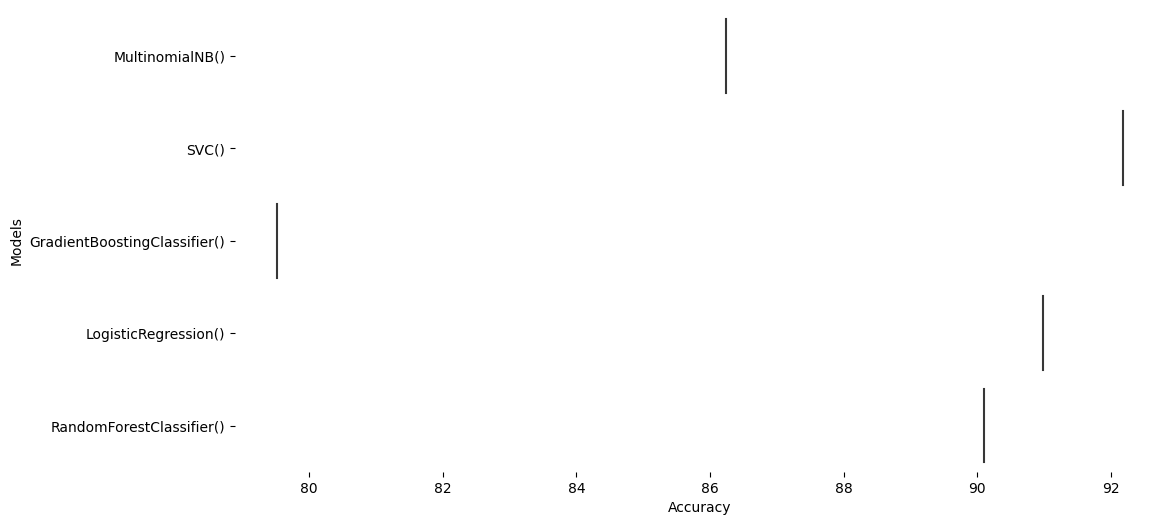

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Accuracy', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

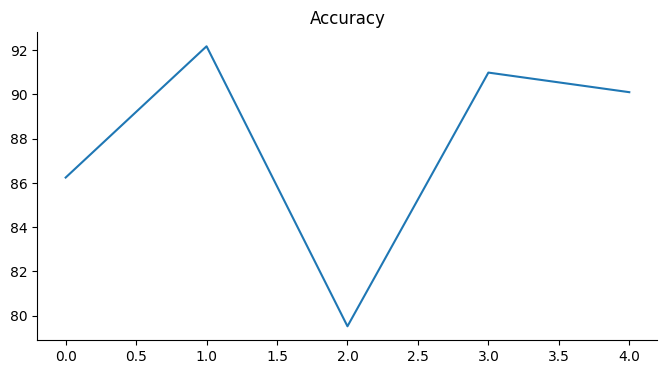

In [ ]:
from matplotlib import pyplot as plt
Report['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

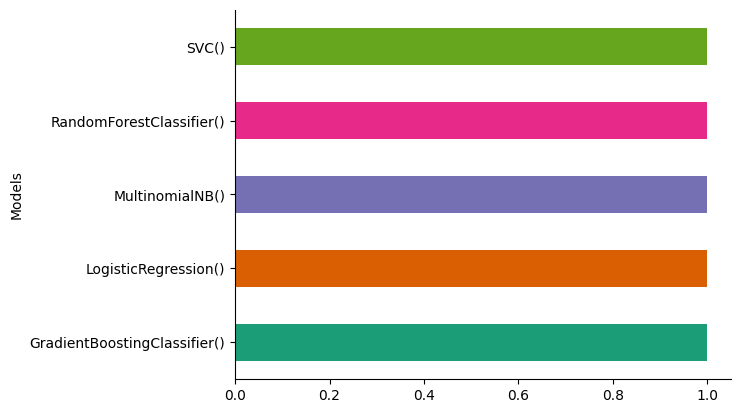

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
Report.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

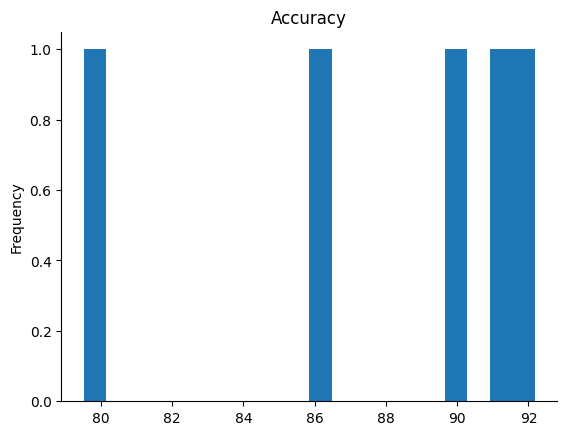

In [ ]:
from matplotlib import pyplot as plt
Report['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)